In [1]:
import pandas as pd

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [3]:
events_data = pd.read_csv('event_data_train.csv')

In [4]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')

In [5]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [6]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [106]:
submissions_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'})

,user_id,timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601
...,...,...
9935,26787,1469015051
9936,26790,1451722691
9937,26794,1511374868
9938,26797,1508425828


In [7]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [5]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')

In [6]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [80]:
events_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [11]:
events_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [7]:
events_data['day'] = events_data.date.dt.date
submissions_data['day'] = submissions_data.date.dt.date

In [82]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:xlabel='day'>

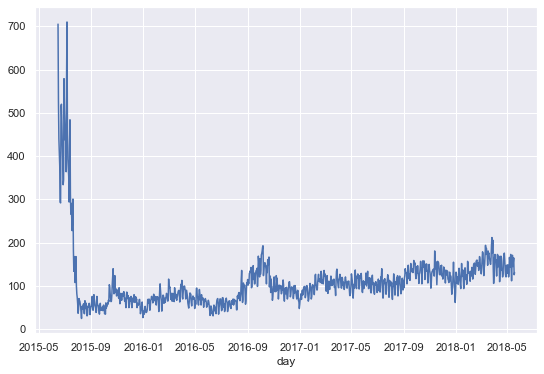

In [14]:
events_data.groupby('day').user_id.nunique().plot()

<AxesSubplot:>

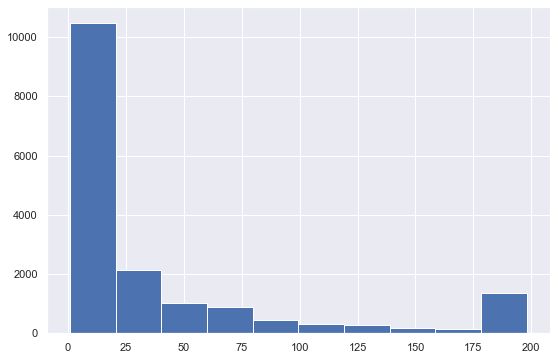

In [15]:
events_data[events_data.action == 'passed'].groupby('user_id', as_index=False).agg({'step_id': 'count'}).step_id.hist()

In [139]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold,max_timestamp
0,32815.0,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048,1.505650e+09
1,32815.0,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048,1.505650e+09
2,32815.0,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048,1.505650e+09
3,32811.0,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048,1.505650e+09
4,32811.0,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048,1.505650e+09


In [8]:
user_events_data = events_data.pivot_table(index='user_id',
                       columns='action',
                       values='step_id',
                       aggfunc='count', fill_value=0).reset_index()

In [137]:
user_events_data.shape

(19234, 5)

In [135]:
users_score.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [9]:
users_score = submissions_data.pivot_table(index='user_id',
                       columns='submission_status',
                       values='step_id',
                       aggfunc='count', fill_value=0).reset_index()

In [20]:
users_score.describe()

submission_status,user_id,correct,wrong
count,9940.000000,9940.000000,9940.000000
mean,13312.917002,22.404930,28.812777
std,7795.938271,26.389536,52.868052
min,2.000000,0.000000,0.000000
25%,6523.500000,2.000000,1.000000
50%,13303.500000,9.000000,9.000000
75%,20101.750000,31.000000,36.000000
max,26798.000000,421.000000,1001.000000


In [21]:
users_score[users_score.correct > 420].head()

submission_status,user_id,correct,wrong
439,1046,421,513


In [22]:
users_score.sort_values('correct', ascending=False).head()

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42


In [23]:
users_score.groupby('correct').agg({'correct': 'count'}).head(10)

,correct
correct,
0,146
1,622
2,2146
3,293
4,204
5,193
6,161
7,269
8,465


In [24]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [25]:
events_data.timestamp.max()

1526772811

In [26]:
events_data.query("timestamp==1526772811")

,step_id,timestamp,action,user_id,date,day
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [10]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [28]:
np.diff([1,3,5])

array([2, 2])

In [29]:
np.concatenate(gap_data, axis=0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [30]:
gap_data

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
          98252,    57019]),
       array([1567990]), array([], dtype=int32)], dtype=object)

In [11]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))

In [12]:
gap_data = gap_data / (24 * 60 * 60)

In [33]:
gap_data[gap_data==0.00030092592592592595]

65861    0.000301
dtype: float64

<AxesSubplot:>

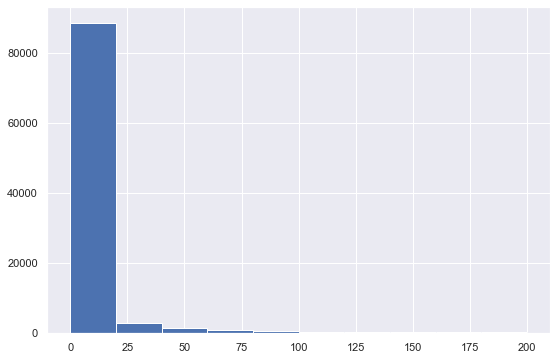

In [34]:
gap_data[gap_data < 200].hist()

In [35]:
gap_data.quantile(0.85)

9.304994791666651

In [36]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [37]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [38]:
30 * 24 * 60 * 60

2592000

In [13]:
user_data = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [16]:
user_data['gone_user'] = (now - user_data.last_timestamp) > drop_out_threshold

In [15]:
now = 1526772811
drop_out_threshold = 2592000

In [43]:
user_data

,user_id,last_timestamp,gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [17]:
users_score.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [18]:
user_data = user_data.merge(users_score, on='user_id', how='outer')

In [19]:
user_data = user_data.fillna(0)

In [47]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [20]:
user_data = user_data.merge(user_events_data, how='outer')

In [21]:
user_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [50]:
user_day.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [22]:
user_data = user_data.merge(user_day, how='outer')

In [23]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [24]:
user_data['passed_course'] = user_data.passed > 170

In [25]:
events_data.user_id.nunique()

19234

In [26]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [61]:
user_data[user_data.passed_course].day.mean()

25.193684210526317

In [27]:
user_min_time = events_data.groupby('user_id', as_index=False).agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis=1)

In [28]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [29]:
user_data = user_data.merge(user_min_time, how='outer')

In [30]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [31]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [32]:
events_data_train = pd.DataFrame()

In [33]:
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [34]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895


In [35]:
learning_time_threshold = 3 * 24 * 60 * 60
learning_time_threshold

259200

In [36]:
user_learning_time_threshold = user_min_time.user_id.map(str) + '_' + (user_min_time.min_timestamp + learning_time_threshold).map(str)

In [37]:
user_learning_time_threshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [38]:
user_min_time['user_learning_time_threshold'] = user_learning_time_threshold

In [39]:
user_min_time.head()

,user_id,min_timestamp,user_learning_time_threshold
0,1,1472827464,1_1473086664
1,2,1514383364,2_1514642564
2,3,1434358476,3_1434617676
3,5,1466156809,5_1466416009
4,7,1521634660,7_1521893860


In [40]:
events_data = events_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')

In [41]:
events_data.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [42]:
events_data_train = events_data[events_data.user_time <= events_data.user_learning_time_threshold]

In [43]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_learning_time_threshold
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,17632_1434340848,17632_1434600048
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,17632_1434340895,17632_1434600048


In [44]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [108]:
sub_data_max = submissions_data.groupby('user_id', as_index=False).agg({'timestamp': 'max'})

In [114]:
sub_data_max = sub_data_max.rename({'timestamp': 'max_timestamp'}, axis=1)

In [115]:
sub_data_max.head()

,user_id,max_timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601


In [133]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [124]:
submissions_data.query("submission_status == 'wrong'").step_id.value_counts().head()

31978    16084
32031    13373
32202    13002
33481    10300
32075    10003
Name: step_id, dtype: int64

In [134]:
submissions_data[submissions_data.submission_status == 'wrong'].groupby(['step_id', 'user_id'], as_index=False).agg({'timestamp': 'max'}).step_id.value_counts()

31978    3423
32031    3255
31972    3064
32202    2614
31971    2517
         ... 
33681     300
31986     274
33998     251
32175     199
32929      59
Name: step_id, Length: 76, dtype: int64

In [116]:
events_data = events_data.merge(sub_data_max, how='outer')

In [45]:
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str)
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_learning_time_threshold']], how='outer')
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_learning_time_threshold]
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [54]:
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index() \
    .rename(columns={'day': 'days'})

In [56]:
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id': 'stepd_tried'})

In [57]:
steps_tried.head()

,user_id,stepd_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [58]:
X = X.merge(steps_tried, on='user_id', how='outer')

In [59]:
X.head()

,user_id,days,stepd_tried
0,2,1,2
1,3,1,4
2,8,1,11
3,14,1,1
4,16,3,23


In [61]:
X = X.merge(submissions_data_train.pivot_table(index='user_id',
                       columns='submission_status',
                       values='step_id',
                       aggfunc='count', fill_value=0).reset_index())

In [62]:
X.head()

,user_id,days,stepd_tried,correct,wrong
0,2,1,2,2,0
1,3,1,4,4,4
2,8,1,11,9,21
3,14,1,1,0,1
4,16,3,23,23,27


In [63]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [64]:
X.head()

,user_id,days,stepd_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [65]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                       columns='action',
                       values='step_id',
                       aggfunc='count', fill_value=0).reset_index()[['user_id', 'viewed']], how='outer')

In [69]:
X = X.fillna(0)

In [72]:
X = X.merge(user_data[['user_id', 'passed_course', 'gone_user']], how='outer')

In [70]:
user_data.head()

,user_id,last_timestamp,gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660


In [73]:
X.head()

,user_id,days,stepd_tried,correct,wrong,correct_ratio,viewed,passed_course,gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [74]:
X = X[~((X.passed_course == False) & (X.gone_user == False))]

In [75]:
X.head()

,user_id,days,stepd_tried,correct,wrong,correct_ratio,viewed,passed_course,gone_user
0,2,1.0,2.0,2.0,0.0,1.00,9,False,True
1,3,1.0,4.0,4.0,4.0,0.50,20,False,True
2,8,1.0,11.0,9.0,21.0,0.30,154,False,True
3,14,1.0,1.0,0.0,1.0,0.00,9,False,True
4,16,3.0,23.0,23.0,27.0,0.46,132,True,True


In [82]:
y = X.passed_course

AttributeError: 'DataFrame' object has no attribute 'passed_course'

In [79]:
X = X.drop(['passed_course', 'gone_user'], axis=1)

In [80]:
X = X.set_index(X.user_id)
X = X.drop('user_id', axis=1)

In [81]:
X.head()

,days,stepd_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.00,9
3,1.0,4.0,4.0,4.0,0.50,20
8,1.0,11.0,9.0,21.0,0.30,154
14,1.0,1.0,0.0,1.0,0.00,9
16,3.0,23.0,23.0,27.0,0.46,132


In [84]:
y.map(int)

0        0
1        0
2        0
3        0
4        1
        ..
19229    0
19230    1
19231    0
19232    0
19233    0
Name: passed_course, Length: 17985, dtype: int64

In [85]:
X.to_csv('X_data.csv')
y.to_csv('Y_data.csv')